In [98]:
#  ライブラリをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from matplotlib import rcParams
import os

In [99]:
#  フォント、スタイルを日本語に設定
mpl.style.use('default')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [100]:
# csvを読み込み
def get_csv(filename):
    return pd.read_csv(filename, encoding='utf-8')

In [101]:
df = get_csv( 'data/ex5_Kp1000.csv')

In [102]:
df.head(3)

,#time[sec],thr[rad],th[rad],d_th[rad/sec],dd_th[rad/sec^2],tau[m*N],Kp,Kd,Ki
0,0.02,1.571,0.027,2.522,170.442,0.24,1000.0,0.0,0.0
1,0.04,1.571,0.106,6.412,278.534,0.24,1000.0,0.0,0.0
2,0.06,1.571,0.239,9.969,291.642,0.24,1000.0,0.0,0.0


In [103]:
#  各カラムを変数に置く
time = df['#time[sec]']  # 時間
thr = df[' thr[rad]']  # 回転角度
th = df[' th[rad]']  # 目標回転角度
d_th = df[' d_th[rad/sec]'] # 角速度
dd_th = df[' dd_th[rad/sec^2]']  #角加速度

In [104]:
#  描画の初期設定
def create_figure():
    # 軸を内側に
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    # サイズ指定
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111)

In [105]:
# 入力ファイル名.pngで出力
def save_file(filename):
    basename = os.path.basename(filename)
    return os.path.splitext(basename)[0]

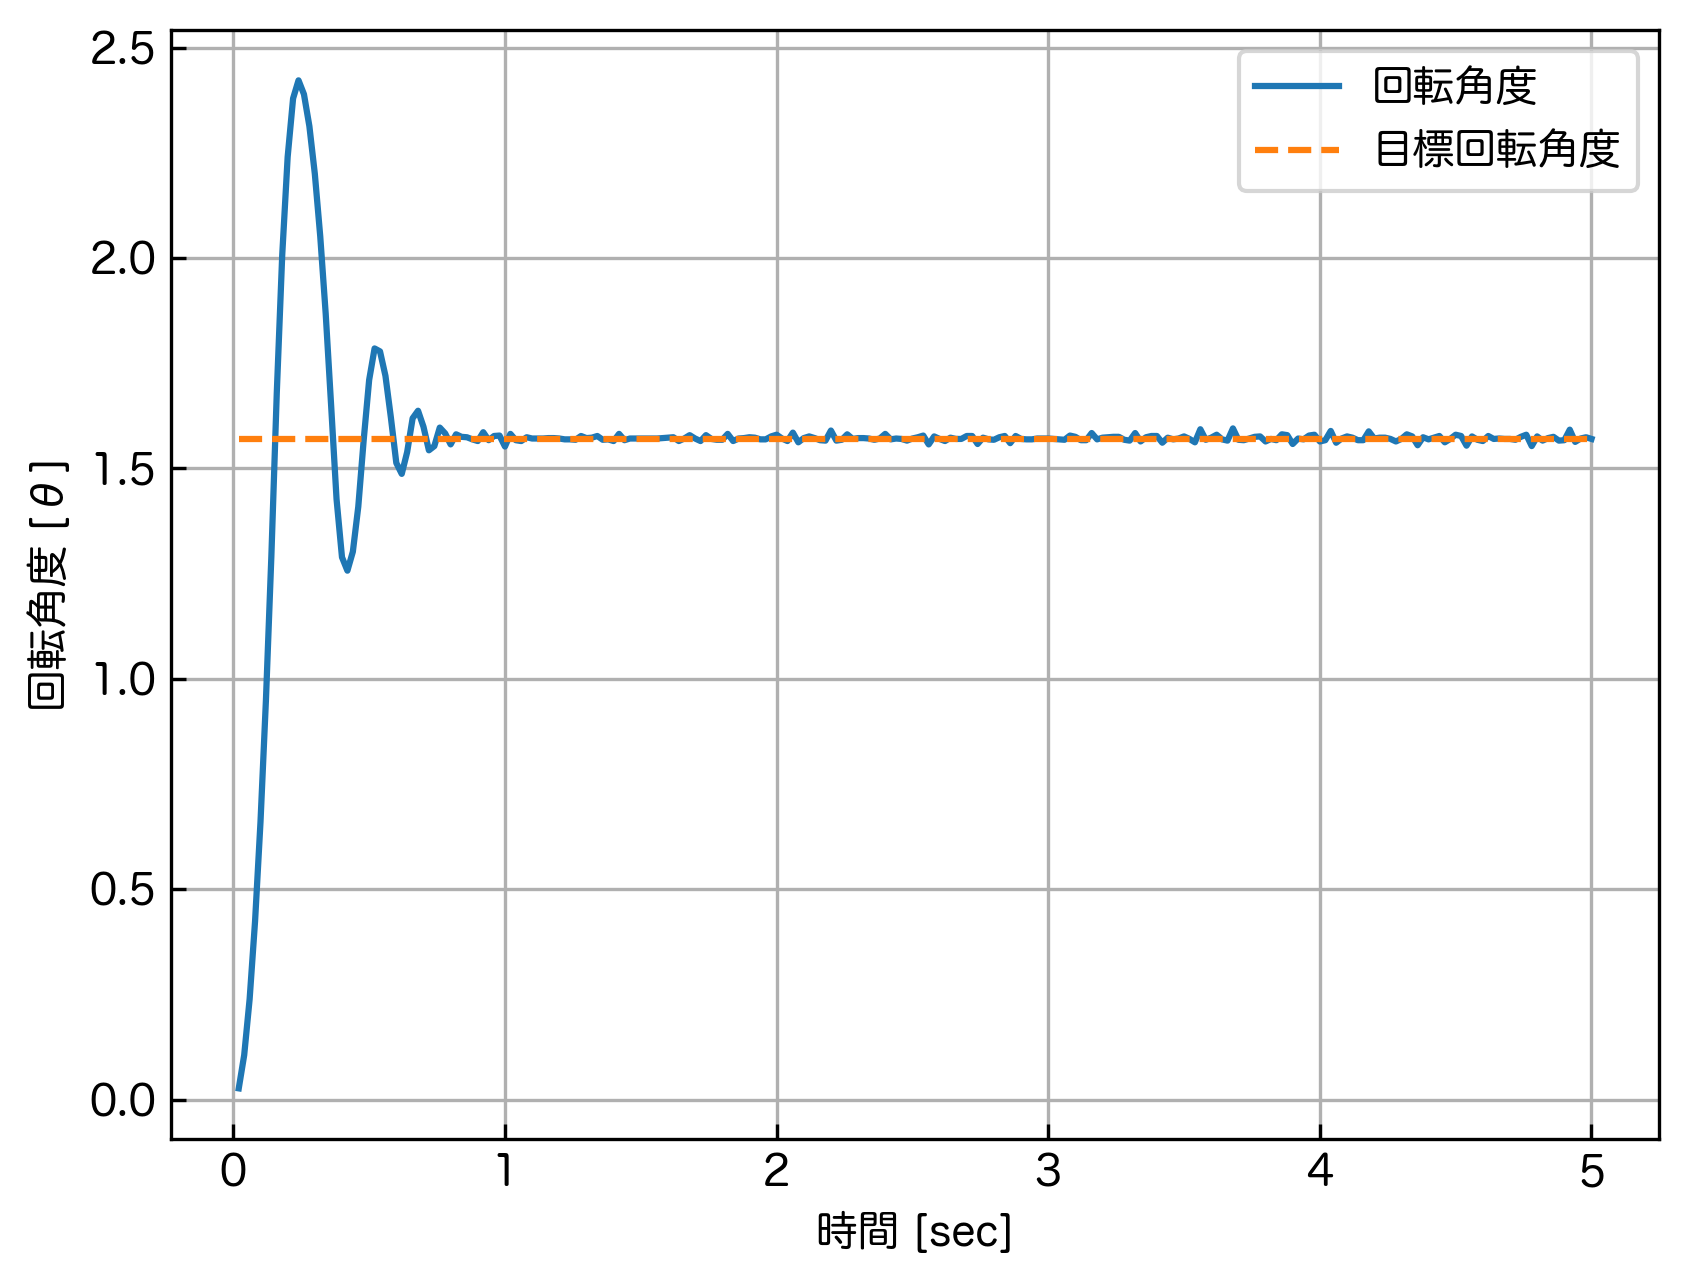

In [106]:
# 時間と回転角度の関係
def rotation_angle():
    create_figure()

    plt.grid()
    plt.xlabel('時間 [sec]')
    plt.ylabel('回転角度 [θ]')
    
    plt.plot(time,th,  label='回転角度')
    plt.plot(time, thr,  linestyle='dashed', label='目標回転角度')
    plt.legend()
    
    basename_without_ext = save_file(filename)
    plt.savefig('img/{}.png'.format(basename_without_ext))

rotation_angle()

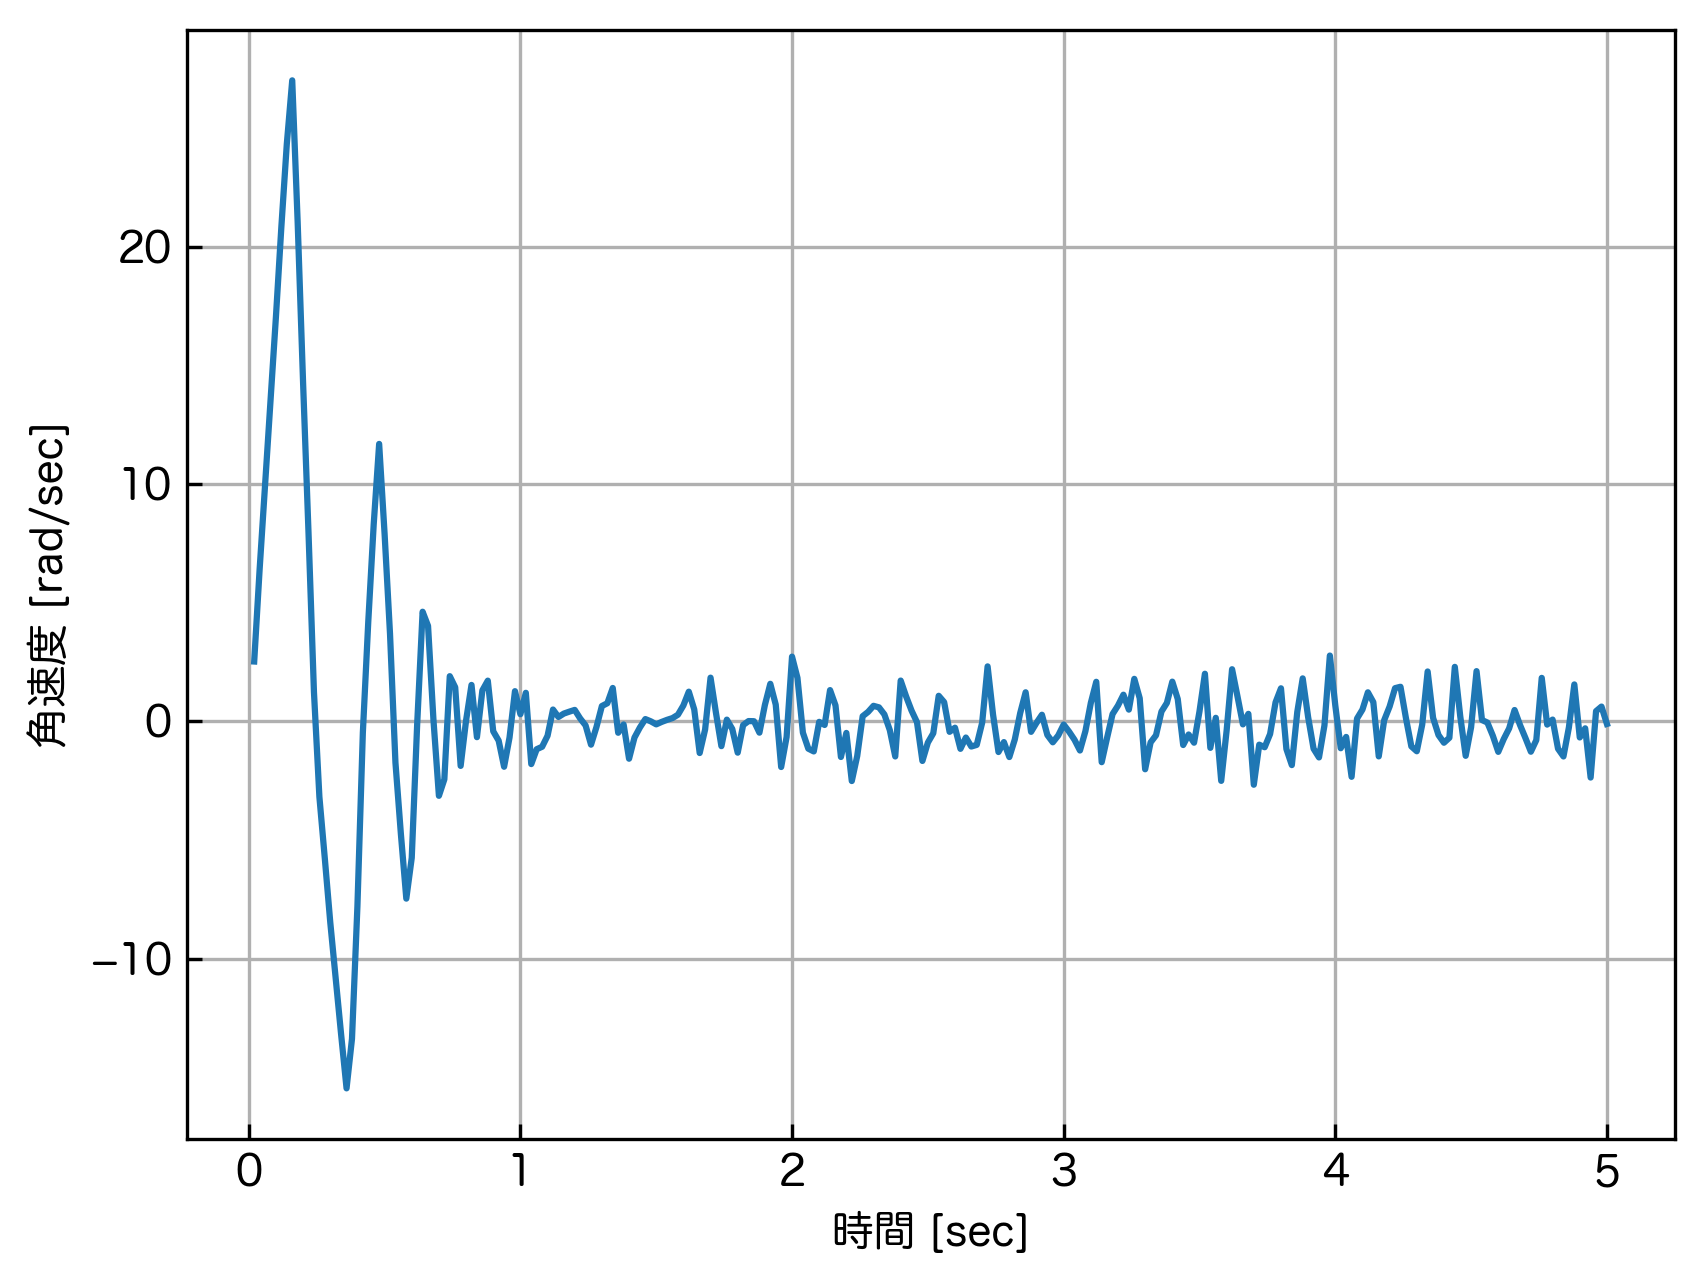

In [107]:
#  時間と角速度の関係
def angular_speed():
    create_figure()

    plt.grid()
    plt.xlabel('時間 [sec]')
    plt.ylabel('角速度 [rad/sec]')
    plt.plot(time, d_th)
    
    basename_without_ext = save_file(filename)
    plt.savefig('img/{0}_{1}.png'.format(basename_without_ext, 'speed'))

angular_speed()

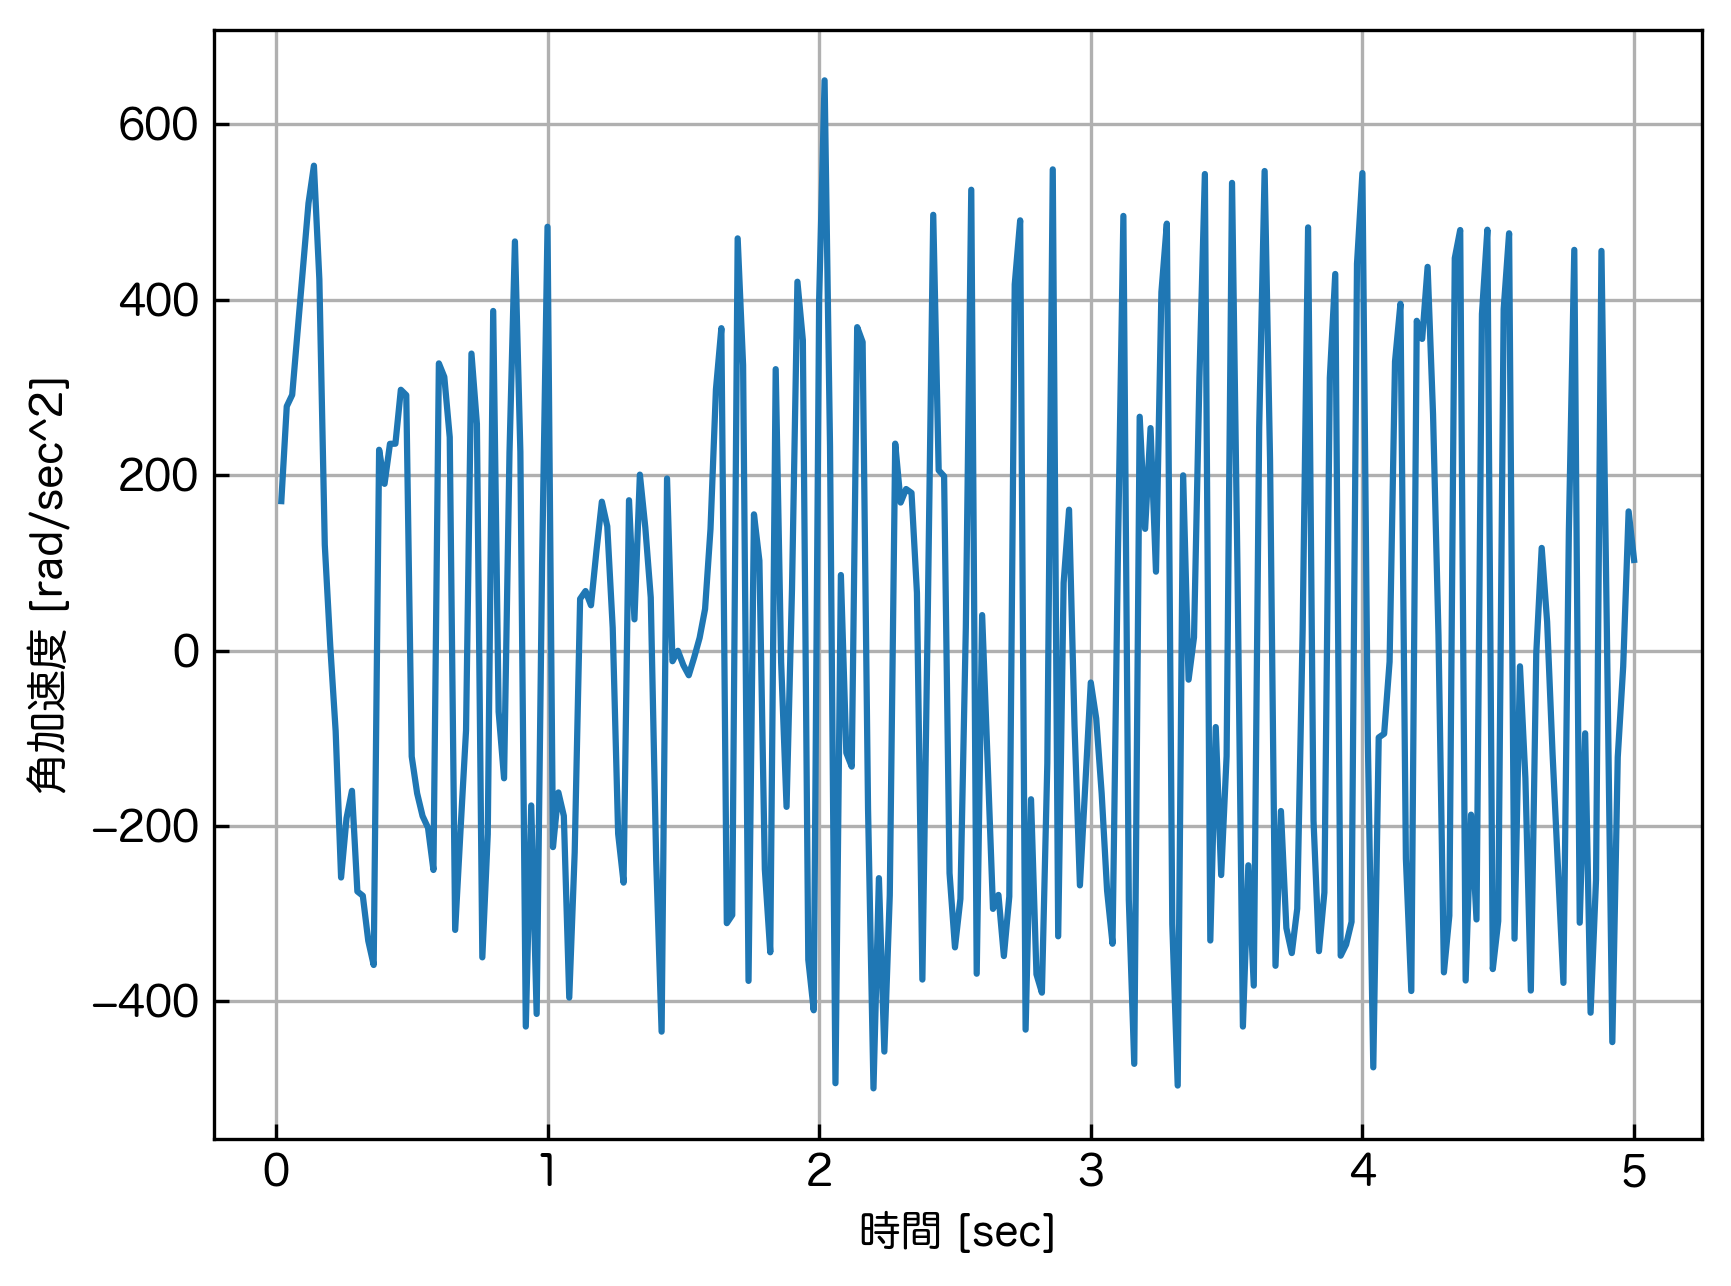

In [108]:
#  時間と角加速度の関係
def angular_acceleration():
    create_figure()

    plt.grid()
    plt.xlabel('時間 [sec]')
    plt.ylabel('角加速度 [rad/sec^2]')
    plt.plot(time, dd_th)
    
    basename_without_ext = save_file(filename)
    plt.savefig('img/{0}_{1}.png'.format(basename_without_ext, 'acceleration'))

angular_acceleration()